# Importação das bibliotecas

In [1]:
from scipy.stats import t
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy.stats import norm
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
from typing import List
import matplotlib.pyplot as plt
import math
from scipy.stats import ttest_ind


In [2]:
def obter_intervalo_confianca(dataframe: pd.DataFrame):    
    conf_level = 0.95
    media = dataframe['preco'].mean()
    std = dataframe['preco'].std()
    n = dataframe.shape[0]
    grausLiberdade = n - 1
    t_value = t.ppf((1 + conf_level) / 2, grausLiberdade)
    inf = media - t_value * std / np.sqrt(n)
    sup = media + t_value * std / np.sqrt(n)
    print('Média:', round(media), ' Desvio padrão:', round(std))
    print('Intervalo de confiança:', round(inf), '-', round(sup))

In [3]:
def obter_resumo(tipo_imovel: str, bairro: str = None, banheiro: int = None, quartos: int = None) -> pd.DataFrame:
    query = f'  tipo_imovel == "{tipo_imovel}"'
    if bairro is not None:
        query += f' and bairro_teste == "{bairro}"  '
    if banheiro is not None:
        query += f' and banheiro == {banheiro} '
    if quartos is not None:
        query += f' and quarto == {quartos} '
    base_original = pd.read_parquet('../data/processed/base_casa.parquet')
    base_original = base_original.query(query)
    return base_original

In [4]:
def obter_estatistica(bairros: List[str], base_original_completa: pd.DataFrame) -> pd.DataFrame:
    lista_dados = []
    for bairro in bairros:
        dados_temp = base_original_completa.query(
            f'bairro_teste == "{bairro}"')
        lista_dados.append(
            {
                'bairro': bairro,
                'media_preco':  round(dados_temp['preco'].mean(), 2),
                'mediana_preco':  round(dados_temp['preco'].median(), 2),
                'moda': round(dados_temp['preco'].mode()[0], 2),
                'desvio_padrao': round(dados_temp['preco'].std(), 2),
                'total_imoveis': dados_temp.shape[0],
                'coeficiente_variacao': (round(dados_temp['preco'].std(), 2) / round(dados_temp['preco'].mean(), 2)) * 100
            }
        )
    df = pd.DataFrame(lista_dados)
    return df
  

- Preço Geral

In [5]:
base_original = obter_resumo(tipo_imovel='Apartamento')
base_original['quarto'] = base_original['quarto'].str.replace('1 Quarto', '1').astype('int32')
base_original['garagem'] = base_original['garagem'].str.replace('--', '0').astype('int32')
base_original['metragem'] = base_original['metragem'].astype('int32')
base_original

,tipo_imovel,nome,preco,metragem,quarto,banheiro,garagem,ID_CASA,bairro_teste
0,Apartamento,"Apartamento com 2 Quartos à Venda, 65m²",310000.00,65,2,2,1,2699716579,Jardim Botânico
2,Apartamento,"Apartamento com 2 Quartos à Venda, 71m²",403500.00,71,2,2,2,2690493538,Bonfim Paulista
3,Apartamento,"Apartamento com 2 Quartos à Venda, 54m²",290000.00,54,2,2,1,2667652105,Nova Aliança
4,Apartamento,"Apartamento com 2 Quartos à Venda, 45m²",166420.00,45,2,1,1,2682840782,Conjunto Habitacional Jardim Das Palmeiras
5,Apartamento,"Apartamento com 2 Quartos à Venda, 64m²",370000.00,64,2,2,2,2688027260,Vila Ana Maria
...,...,...,...,...,...,...,...,...,...
9967,Apartamento,"Apartamento com 3 Quartos à Venda, 81m²",540000.00,81,3,2,2,2696267182,Vila Do Golf
9968,Apartamento,"Apartamento com Quarto à Venda, 61m²",280000.00,61,1,1,1,2476716299,Centro
9969,Apartamento,"Apartamento com 3 Quartos à Venda, 83m²",375000.00,83,3,3,2,2693112449,Jardim São Luiz
9970,Apartamento,"Apartamento com 2 Quartos à Venda, 48m²",175000.00,48,2,1,1,2572455642,Lagoinha


In [6]:
base_original = base_original.drop_duplicates()
base_original.shape

(8395, 9)

In [7]:
base_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8395 entries, 0 to 9971
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tipo_imovel   8395 non-null   string 
 1   nome          8395 non-null   string 
 2   preco         8395 non-null   float64
 3   metragem      8395 non-null   int32  
 4   quarto        8395 non-null   int32  
 5   banheiro      8395 non-null   string 
 6   garagem       8395 non-null   int32  
 7   ID_CASA       8395 non-null   int64  
 8   bairro_teste  8395 non-null   string 
dtypes: float64(1), int32(3), int64(1), string(4)
memory usage: 557.5 KB


In [8]:
base_original['banheiro'].unique()

<StringArray>
[ '2 ',  '1 ',  '3 ',  '5 ',  '4 ',  '9 ',  '7 ',  '6 ', '20 ',  '8 ', '11 ',
 '13 ', '12 ', '10 ']
Length: 14, dtype: string

In [9]:
base_original['garagem'].unique()

array([  1,   2,   0,   4,   3,   5, 192,  10,  19,   6,   8,   7],
      dtype=int32)

In [10]:
for bairro in base_original['bairro_teste'].unique():
    print(bairro)

Jardim Botânico
Bonfim Paulista
Nova Aliança
Conjunto Habitacional Jardim Das Palmeiras
Vila Ana Maria
Jardim Republica
Lagoinha
Jardim Sumare
Parque Dos Bandeirantes
Ipiranga
Vila Monte Alegre
Parque Dos Lagos
Alto Da Boa Vista
Jardim Presidente Medici
Vila Virginia
Jardim Itaú
Residencial Greenville
Residencial E Comercial Palmares
Jardim Palma Travassos
Vila Tibério
Jardim Javari
Campos Eliseos
Reserva Real
Vila Seixas
Geraldo Correia De Carvalho
Jardim Anhanguéra
Jardim Nova Aliança Sul
Residencial Alto Do Ipe
Parque Industrial Lagoinha
Parque São Sebastião
City Ribeirão
Jardim Irajá
Reserva Sul Condomínio Resort
Jardim Independencia
Iguatemi
Recanto Das Palmeiras
Vila Amélia
Ribeirânia
Residencial Flórida
Quintino Facci Ii
Jardim Paulistano
Jardim Florestan Fernandes
Jardim Paulista
Jardim Interlagos
Centro
Planalto Verde I
Quinta Da Primavera
Alto Do Ipiranga
Jardim Olhos D Agua
Jardim José Figueira
Jardim Zara
Jardim Heitor Rigon
Santa Cruz Do José Jacques
Vila Maria Luiza
Quint

In [11]:
base_original[['banheiro', 'garagem']] = base_original[['banheiro', 'garagem']].astype('int32')

/tmp/ipykernel_5368/3966004037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_original[['banheiro', 'garagem']] = base_original[['banheiro', 'garagem']].astype('int32')


In [12]:
base_original.describe()

,preco,metragem,quarto,banheiro,garagem,ID_CASA
count,8395.00,8395.00,8395.00,8395.00,8395.00,8395.00
mean,450640.89,87.23,2.32,2.10,1.46,2635153434.16
std,453436.77,87.68,0.77,1.32,2.23,98351619.28
min,61045.00,10.00,1.00,1.00,0.00,54472404.00
25%,215000.00,49.00,2.00,1.00,1.00,2603212877.50
50%,320000.00,70.00,2.00,2.00,1.00,2658818753.00
75%,520000.00,103.00,3.00,3.00,2.00,2678280998.00
max,8000000.00,4687.00,20.00,20.00,192.00,2700624992.00


- Total Imóveis

In [13]:
base_original.groupby('bairro_teste').size().reset_index(name='count').sort_values(by='count', ascending=False).nlargest(50, 'count')


,bairro_teste,count
34,Jardim Botânico,739
9,Centro,736
98,Nova Aliança,661
51,Jardim Irajá,353
74,Jardim Paulista,315
137,Ribeirânia,235
8,Campos Eliseos,178
73,Jardim Palma Travassos,175
69,Jardim Olhos D Agua,172
29,Ipiranga,166


In [14]:
base_original.columns

Index(['tipo_imovel', 'nome', 'preco', 'metragem', 'quarto', 'banheiro',
       'garagem', 'ID_CASA', 'bairro_teste'],
      dtype='object')

- Total de imoveis ,Média, Moda e Mediana: Jardim Botânico, Centro, Nova Aliança, Jardim Irajá, Sumarezinho, Vila Tibério, Vila monte alegre 

In [15]:
bairros = [
    'Jardim Botânico',
    'Centro',
    'Nova Aliança',
    'Jardim Irajá',
    'Sumarezinho', 
    'Vila Monte Alegre', 
    'Bonfim Paulista',
    'Ribeirânia',
    'Campos Eliseos'
]

In [16]:
base_bairros = base_original[base_original['bairro_teste'].isin(bairros)]

In [17]:
base_bairros.head()

,tipo_imovel,nome,preco,metragem,quarto,banheiro,garagem,ID_CASA,bairro_teste
0,Apartamento,"Apartamento com 2 Quartos à Venda, 65m²",310000.00,65,2,2,1,2699716579,Jardim Botânico
2,Apartamento,"Apartamento com 2 Quartos à Venda, 71m²",403500.00,71,2,2,2,2690493538,Bonfim Paulista
3,Apartamento,"Apartamento com 2 Quartos à Venda, 54m²",290000.00,54,2,2,1,2667652105,Nova Aliança
9,Apartamento,"Apartamento com 2 Quartos à Venda, 64m²",370000.00,64,2,2,2,2694181987,Jardim Botânico
14,Apartamento,"Apartamento com 2 Quartos à Venda, 84m²",298000.00,84,2,2,1,2586310967,Vila Monte Alegre


In [18]:
base_bairros.groupby('metragem').count()

,tipo_imovel,nome,preco,quarto,banheiro,garagem,ID_CASA,bairro_teste
metragem,,,,,,,,
10,3,3,3,3,3,3,3,3
18,1,1,1,1,1,1,1,1
20,1,1,1,1,1,1,1,1
23,1,1,1,1,1,1,1,1
24,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
530,2,2,2,2,2,2,2,2
700,1,1,1,1,1,1,1,1
721,1,1,1,1,1,1,1,1


In [19]:
base_bairros.pivot_table(index='garagem', columns='bairro_teste', aggfunc='size', fill_value=0)

bairro_teste,Bonfim Paulista,Campos Eliseos,Centro,Jardim Botânico,Jardim Irajá,Nova Aliança,Ribeirânia,Sumarezinho,Vila Monte Alegre
garagem,,,,,,,,,
0,3,9,91,11,6,8,0,3,0
1,75,148,434,227,152,317,193,109,67
2,46,21,169,389,142,291,30,5,8
3,9,0,27,72,35,40,0,0,2
4,5,0,15,28,15,5,12,1,0
5,0,0,0,5,2,0,0,0,0
6,1,0,0,6,1,0,0,0,0
8,1,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,1


In [20]:
base_bairros.pivot_table(index='quarto', columns='bairro_teste', aggfunc='size', fill_value=0)

bairro_teste,Bonfim Paulista,Campos Eliseos,Centro,Jardim Botânico,Jardim Irajá,Nova Aliança,Ribeirânia,Sumarezinho,Vila Monte Alegre
quarto,,,,,,,,,
1,6,3,103,111,35,186,66,0,21
2,92,83,165,254,85,236,140,104,44
3,40,90,402,328,206,229,26,13,12
4,1,1,64,46,26,10,3,1,0
5,2,1,2,0,1,0,0,0,0
20,0,0,0,0,0,0,0,0,1


In [21]:
base_banheiro = base_bairros.pivot_table(index='banheiro', columns='bairro_teste', aggfunc='size', fill_value=0).sort_index().reset_index()
base_banheiro


bairro_teste,banheiro,Bonfim Paulista,Campos Eliseos,Centro,Jardim Botânico,Jardim Irajá,Nova Aliança,Ribeirânia,Sumarezinho,Vila Monte Alegre
0,1,69,97,164,151,64,245,131,72,40
1,2,31,56,208,251,126,166,80,45,36
2,3,9,24,226,107,78,137,8,1,1
3,4,21,0,75,89,42,55,5,0,0
4,5,7,1,54,119,35,52,6,0,0
5,6,3,0,5,13,6,3,4,0,0
6,7,0,0,2,5,1,2,1,0,0
7,8,1,0,0,0,0,1,0,0,0
8,9,0,0,2,2,1,0,0,0,0
9,12,0,0,0,1,0,0,0,0,0


In [22]:
base_banheiro.columns

Index(['banheiro', 'Bonfim Paulista', 'Campos Eliseos', 'Centro',
       'Jardim Botânico', 'Jardim Irajá', 'Nova Aliança', 'Ribeirânia',
       'Sumarezinho', 'Vila Monte Alegre'],
      dtype='string', name='bairro_teste')

In [23]:

base_bairros['bairro_teste'] = base_bairros['bairro_teste'].str.strip()
dados_estatisticos = []
for bairro in bairros:
    amostras = {}
    base_temp = base_bairros.query(f'bairro_teste == "{bairro}"')
    amostras['bairro'] = bairro
    amostras['total_imoveis'] = base_temp.shape[0]
    amostras['media'] = round(base_temp["preco"].mean(), 2)
    amostras['max_preco'] = round(base_temp["preco"].max(), 2)
    amostras['min_preco'] = round(base_temp["preco"].min(), 2)
    amostras['mediana'] = round(base_temp["preco"].median(), 2)
    amostras['moda'] = round(base_temp["preco"].mode()[0], 2)
    amostras['desvio_padrao'] = round(base_temp["preco"].std(), 2)
    amostras['erro_padrao'] = round(base_temp["preco"].std(), 2) / math.sqrt(base_temp.shape[0])
    amostras['graus_liberdade'] = base_temp.shape[0] - 1
    amostras['ic_limite_inferior'] = norm.interval(0.95,  loc=round(base_temp["preco"].mean(), 2), scale=round(base_temp["preco"].std(), 2) / math.sqrt(base_temp.shape[0]))[0]
    amostras['ic_limite_superior'] = norm.interval(0.95,  loc=round(base_temp["preco"].mean(), 2), scale=round(base_temp["preco"].std(), 2) / math.sqrt(base_temp.shape[0]))[1]
    dados_estatisticos.append(amostras)
base_dados_bairros_selecionados = pd.DataFrame(dados_estatisticos)
base_dados_bairros_selecionados


/tmp/ipykernel_5368/2173231052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_bairros['bairro_teste'] = base_bairros['bairro_teste'].str.strip()


,bairro,total_imoveis,media,max_preco,min_preco,mediana,moda,desvio_padrao,erro_padrao,graus_liberdade,ic_limite_inferior,ic_limite_superior
0,Jardim Botânico,739,744389.39,8000000.00,180000.00,553000.00,320000.00,720996.16,26522.27,738,692406.69,796372.09
1,Centro,736,402076.73,3100000.00,92000.00,360000.00,450000.00,223344.46,8232.59,735,385941.16,418212.30
2,Nova Aliança,661,518588.20,2290000.00,133000.00,430000.00,350000.00,300496.67,11687.97,660,495680.21,541496.19
3,Jardim Irajá,353,600323.40,2150000.00,150000.00,450000.00,430000.00,354985.06,18893.95,352,563291.94,637354.86
4,Sumarezinho,118,245524.66,590000.00,117000.00,230000.00,170000.00,72993.17,6719.57,117,232354.55,258694.77
5,Vila Monte Alegre,78,282407.71,2500000.00,125000.00,260000.00,150000.00,265524.94,30064.78,77,223481.83,341333.59
6,Bonfim Paulista,141,589270.00,7451000.00,104652.00,295000.00,190000.00,911435.88,76756.75,140,438829.54,739710.46
7,Ribeirânia,235,437058.97,2301000.00,120000.00,360000.00,150000.00,395303.50,25786.76,234,386517.85,487600.09
8,Campos Eliseos,178,268860.11,636000.00,110000.00,235000.00,210000.00,103916.72,7788.89,177,253594.17,284126.05


# Testes de hipóteses

In [24]:
significancia = 0.05
confianca = 1 - significancia

- Preço por área

In [25]:
bairros = [
    ('Jardim Botânico', 100), 
    ('Centro', 80), 
    ('Nova Aliança', 100), 
    ('Jardim Irajá', 35), 
    ('Sumarezinho', 50), 
    ('Vila Monte Alegre', 33), 
    ('Bonfim Paulista', 60),
    ('Ribeirânia', 60),
    ('Campos Eliseos', 80)
    
]
metro = 60
for bairro in bairros:
    try:
        print('*' * 20, bairro[0], '*' * 20)
        base_temp = base_bairros.query(f'bairro_teste == "{ bairro[0]}"')
        print(base_temp.shape)
        base_menor_area = base_temp.query(f'metragem < {metro}').sample(n=bairro[1], random_state=101).preco
        base_maior_area = base_temp.query(f'metragem >= {metro}').sample(n=bairro[1], random_state=101).preco
        print(f'base_maior_area shape {base_maior_area.shape} -> base_menor_area shape {base_menor_area.shape}' )
        t_stat, p_value = ttest_ind(base_menor_area, base_maior_area, alternative='greater')
        print(f'Estatística t: {t_stat}')
        print(f'Valor p: {p_value}')
        alpha = 0.05
        if p_value < alpha:
            print(f'Rejeitamos a hipótese nula: os preços dos apartamentos de até {metro} m² são significativamente maiores.')
        else:
            print(f'Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até {metro} m² são maiores.')
    except Exception as e:
        print(bairro)
    print()


******************** Jardim Botânico ********************
(739, 9)
base_maior_area shape (100,) -> base_menor_area shape (100,)
Estatística t: -5.569104011210093
Valor p: 0.9999999586374804
Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.

******************** Centro ********************
(736, 9)
base_maior_area shape (80,) -> base_menor_area shape (80,)
Estatística t: -10.462586201255423
Valor p: 1.0
Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.

******************** Nova Aliança ********************
(661, 9)
base_maior_area shape (100,) -> base_menor_area shape (100,)
Estatística t: -14.946243044767833
Valor p: 1.0
Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.

******************** Jardim Irajá ********************
(353, 9)
base_maio

# Teste de hipótese quartos

In [47]:
bairros =[ 
    ('Bonfim Paulista', 40),
    ('Campos Eliseos', 60),
    ('Centro', 100),
    ('Jardim Botânico', 100),
    ('Jardim Irajá', 80),
    ('Nova Aliança', 100),
    ('Ribeirânia', 26)
]

In [52]:
for bairro in bairros:
    print('*' * 20, bairro[0], '*' * 20)
    base_temp = base_bairros.query(f'bairro_teste == "{bairro[0]}"')
    base_tres_quartos = base_temp.query(f' quarto == 3')
    base_dois_quartos = base_temp.query(f' quarto in [1, 2]')
    print(f'base_tres_quartos.shape:  {base_tres_quartos.shape} base_dois_quartos.shape {base_dois_quartos.shape}')
    base_tres_quartos = base_tres_quartos.sample(n=bairro[1], random_state=101).preco
    base_dois_quartos = base_dois_quartos.sample(n=bairro[1], random_state=101).preco

******************** Bonfim Paulista ********************
base_tres_quartos.shape:  (40, 9) base_dois_quartos.shape (98, 9)
******************** Campos Eliseos ********************
base_tres_quartos.shape:  (90, 9) base_dois_quartos.shape (86, 9)
******************** Centro ********************


base_tres_quartos.shape:  (402, 9) base_dois_quartos.shape (268, 9)
******************** Jardim Botânico ********************
base_tres_quartos.shape:  (328, 9) base_dois_quartos.shape (365, 9)
******************** Jardim Irajá ********************
base_tres_quartos.shape:  (206, 9) base_dois_quartos.shape (120, 9)
******************** Nova Aliança ********************
base_tres_quartos.shape:  (229, 9) base_dois_quartos.shape (422, 9)
******************** Ribeirânia ********************
base_tres_quartos.shape:  (26, 9) base_dois_quartos.shape (206, 9)




# Parâmetros da Função ttest_ind
A função ttest_ind tem vários parâmetros importantes:

1 - a, b: As duas amostras independentes.
2 - alternative: Especifica a hipótese alternativa. Pode ser 'two-sided' (padrão), 'less', ou 'greater'.
- 'two-sided': Testa se as médias são diferentes (bicaudal).
- 'less': Testa se a média da primeira amostra é menor que a média da segunda (unicaudal).
- 'greater': Testa se a média da primeira amostra é maior que a média da segunda (unicaudal).
<p>equal_var: Por padrão, é True, assumindo que as variâncias das duas populações são iguais. Se False, realiza o teste de Welch, que não assume variâncias iguais.</p>



<p>Testes de hipóteses por bairro</p>
<p>Verificar se os preços dos apartamentos de até 60 m2 são maiores que os apartamentos  de 60 metros</p>
<p>- m1 = média de preços para quartos menores ou iguais que 60 m2 </p>
<p>- m2 = média de preços para quartos maiores que 60 m2</p>
<p>- H0: m1  <=   m2 → Hipótese nula</p>
<p>-Ha: m1 > m2→ Hipótese Alternativa</p>

In [26]:
bairro = 'Vila Monte Alegre'
base_temp = base_bairros.query(f'bairro_teste == "{bairro}"')
base_maior_area = base_temp.query('metragem > 60')
base_maior_area.shape

(42, 9)

In [27]:
bairro = 'Campos Eliseos'
base_temp = base_bairros.query(f'bairro_teste == "{bairro}"')
base_temp

,tipo_imovel,nome,preco,metragem,quarto,banheiro,garagem,ID_CASA,bairro_teste
34,Apartamento,"Apartamento com 2 Quartos à Venda, 59m²",230000.00,59,2,2,1,2690493171,Campos Eliseos
42,Apartamento,"Apartamento com 3 Quartos à Venda, 80m²",235000.00,80,3,2,1,2688461048,Campos Eliseos
59,Apartamento,"Apartamento com 2 Quartos à Venda, 58m²",192000.00,58,2,1,1,2576306928,Campos Eliseos
63,Apartamento,"Apartamento com 3 Quartos à Venda, 80m²",235000.00,80,3,2,1,2684807099,Campos Eliseos
82,Apartamento,"Apartamento com 2 Quartos à Venda, 48m²",190000.00,48,2,1,1,2673154283,Campos Eliseos
...,...,...,...,...,...,...,...,...,...
9560,Apartamento,"Apartamento com 3 Quartos à Venda, 95m²",570000.00,95,3,2,2,2689137752,Campos Eliseos
9792,Apartamento,"Apartamento com 3 Quartos à Venda, 97m²",325000.00,97,3,2,1,2686290828,Campos Eliseos
9842,Apartamento,"Apartamento com 3 Quartos à Venda, 70m²",170000.00,70,3,1,1,2666440226,Campos Eliseos
9873,Apartamento,"Apartamento com 3 Quartos à Venda, 125m²",420000.00,125,3,2,1,2672354116,Campos Eliseos


In [28]:

base_menor_area = base_temp.query('metragem <= 60')
base_maior_area = base_temp.query('metragem > 60')
base_menor_area.shape, base_maior_area.shape

((89, 9), (89, 9))

In [29]:
bairro = 'Vila Monte Alegre'
base_temp = base_bairros.query(f'bairro_teste == "{bairro}"')
base_menor_area = base_temp.query('metragem <= 60').sample(n=33, random_state=101).preco
base_maior_area = base_temp.query('metragem > 60').sample(n=33, random_state=101).preco
media_menor_area = base_menor_area.mean()
media_maior_area = base_maior_area.mean()
dp_menor_area = base_menor_area.std()
dp_maior_area = base_maior_area.std()

media_menor_area,  media_maior_area
t_stat, p_value = ttest_ind(base_menor_area, base_maior_area, alternative='greater')


# Imprimir os resultados
print(f'Estatística t: {t_stat}')
print(f'Valor p: {p_value}')


alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: os preços dos apartamentos de até 60 m² são significativamente maiores.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.")

Estatística t: -1.7764246995789812
Valor p: 0.9597920885843831
Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que os preços dos apartamentos de até 60 m² são maiores.


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Gerar dados de exemplo
np.random.seed(0)
data1 = base_temp.query('metragem <= 60').sample(n=33, random_state=101).preco
data2 = base_temp.query('metragem > 60').sample(n=33, random_state=101).preco
data1.shape

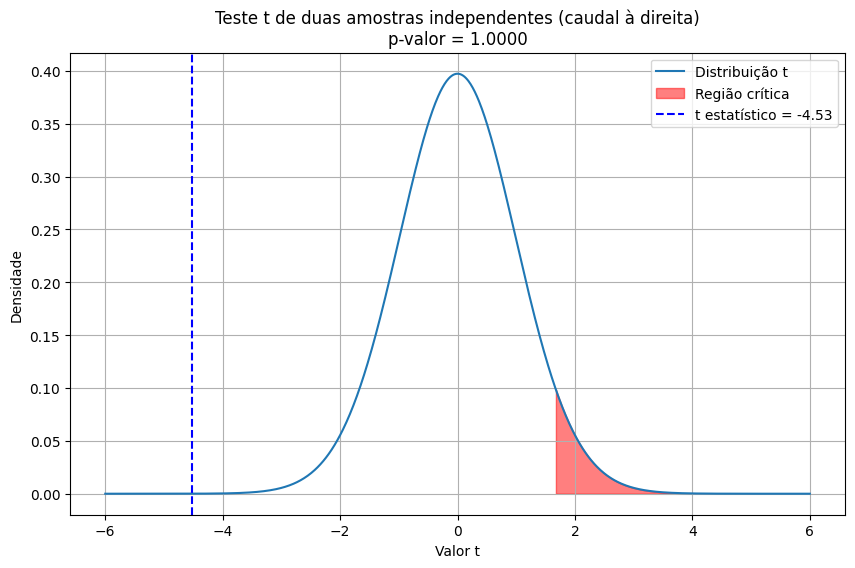

In [75]:

# Realizar o teste t de duas amostras (caudal à direita)
t_statistic, p_value = stats.ttest_ind(data1, data2, alternative='greater')

# Parâmetros para o gráfico
df = len(data1) + len(data2) - 2
alpha = 0.05

# Gerar a distribuição t
x = np.linspace(-6, 6, 1000)
y = stats.t.pdf(x, df)

# Determinar o valor crítico para o teste caudal à direita
critical_value = stats.t.ppf(1 - alpha, df)

# Plotar a distribuição t
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t')

# Sombra para a região crítica
plt.fill_between(x, y, where=(x > critical_value), color='red', alpha=0.5, label='Região crítica')

# Linha para o valor t observado
plt.axvline(x=t_statistic, color='blue', linestyle='--', label=f't estatístico = {t_statistic:.2f}')

# Adicionar legendas e títulos
plt.legend()
plt.xlabel('Valor t')
plt.ylabel('Densidade')
plt.title(f'Teste t de duas amostras independentes (caudal à direita)\np-valor = {p_value:.4f}')
plt.grid(True)
plt.show()

# Exemplo teste t student

In [87]:
bairro = 'Ribeirânia'
base_temp = base_bairros.query(f'bairro_teste == "{bairro}"')
base_menor_area = base_temp.query('metragem <= 60').sample(n=27, random_state=101).preco
base_maior_area = base_temp.query('metragem > 60').sample(n=27, random_state=101).preco
base_menor_area.shape , base_maior_area.shape

estatistica, p_valor = ttest_ind(base_menor_area, base_maior_area)

print("Estatística do teste:", estatistica)
print("Valor-p:", p_valor)

Estatística do teste: -4.194767180685637
Valor-p: 0.00010667925728768742


# Exemplos Gráficos Teste de hipótese

- Bicaudal

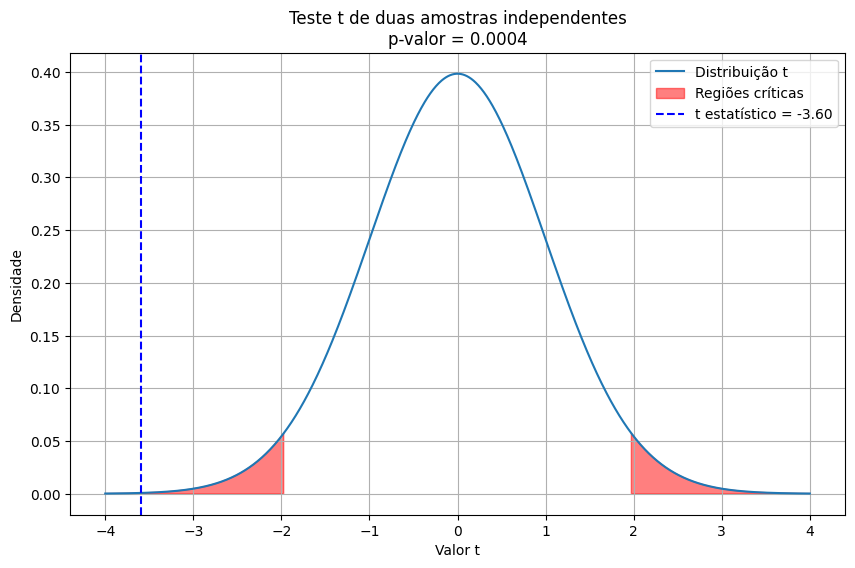

In [71]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Gerar dados de exemplo
np.random.seed(0)
data1 = np.random.normal(loc=5, scale=1, size=100)
data2 = np.random.normal(loc=5.5, scale=1, size=100)

# Realizar o teste t de duas amostras
t_statistic, p_value = stats.ttest_ind(data1, data2)

# Parâmetros para o gráfico
df = len(data1) + len(data2) - 2
alpha = 0.05

# Gerar a distribuição t
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Determinar os valores críticos
critical_value = stats.t.ppf(1 - alpha/2, df)

# Plotar a distribuição t
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t')

# Sombras para as regiões críticas
plt.fill_between(x, y, where=(x < -critical_value) | (x > critical_value), color='red', alpha=0.5, label='Regiões críticas')

# Linha para o valor t observado
plt.axvline(x=t_statistic, color='blue', linestyle='--', label=f't estatístico = {t_statistic:.2f}')

# Adicionar legendas e títulos
plt.legend()
plt.xlabel('Valor t')
plt.ylabel('Densidade')
plt.title(f'Teste t de duas amostras independentes\np-valor = {p_value:.4f}')
plt.grid(True)
plt.show()


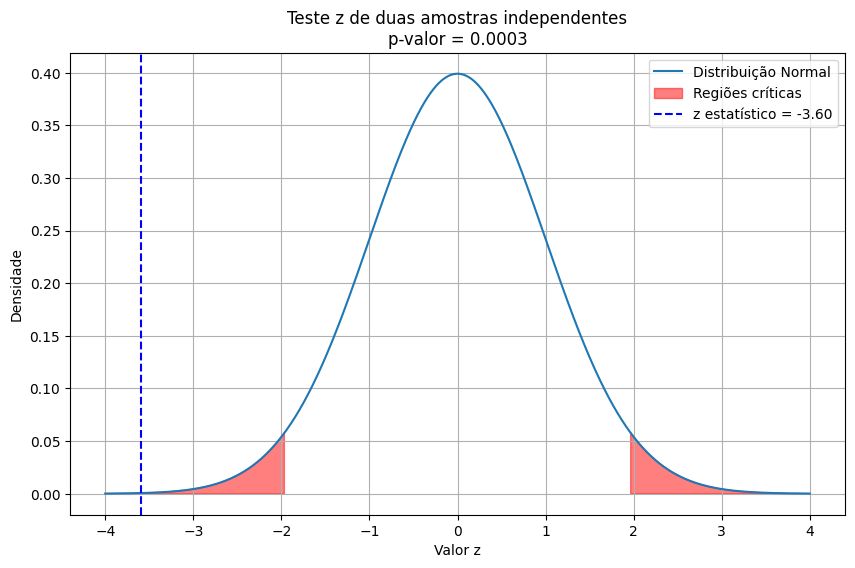

In [79]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Gerar dados de exemplo
np.random.seed(0)
data1 = np.random.normal(loc=5, scale=1, size=100)
data2 = np.random.normal(loc=5.5, scale=1, size=100)

# Calcular as estatísticas da amostra
mean1, mean2 = np.mean(data1), np.mean(data2)
std1, std2 = np.std(data1, ddof=1), np.std(data2, ddof=1)
n1, n2 = len(data1), len(data2)

# Calcular a estatística z e o p-valor
pooled_std = np.sqrt((std1**2 / n1) + (std2**2 / n2))
z_statistic = (mean1 - mean2) / pooled_std
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistic)))

# Parâmetros para o gráfico
alpha = 0.05

# Gerar a distribuição normal
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

# Determinar os valores críticos
critical_value = stats.norm.ppf(1 - alpha/2)

# Plotar a distribuição normal
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição Normal')

# Sombras para as regiões críticas
plt.fill_between(x, y, where=(x < -critical_value) | (x > critical_value), color='red', alpha=0.5, label='Regiões críticas')

# Linha para o valor z observado
plt.axvline(x=z_statistic, color='blue', linestyle='--', label=f'z estatístico = {z_statistic:.2f}')

# Adicionar legendas e títulos
plt.legend()
plt.xlabel('Valor z')
plt.ylabel('Densidade')
plt.title(f'Teste z de duas amostras independentes\np-valor = {p_value:.4f}')
plt.grid(True)
plt.show()


- Caudal a direita

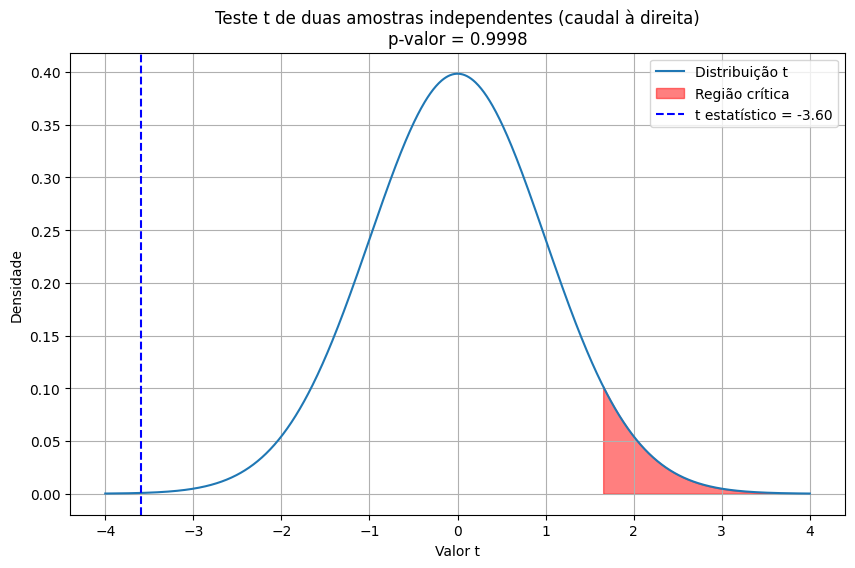

In [72]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Gerar dados de exemplo
np.random.seed(0)
data1 = np.random.normal(loc=5, scale=1, size=100)
data2 = np.random.normal(loc=5.5, scale=1, size=100)

# Realizar o teste t de duas amostras (caudal à direita)
t_statistic, p_value = stats.ttest_ind(data1, data2, alternative='greater')

# Parâmetros para o gráfico
df = len(data1) + len(data2) - 2
alpha = 0.05

# Gerar a distribuição t
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Determinar o valor crítico para o teste caudal à direita
critical_value = stats.t.ppf(1 - alpha, df)

# Plotar a distribuição t
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t')

# Sombra para a região crítica
plt.fill_between(x, y, where=(x > critical_value), color='red', alpha=0.5, label='Região crítica')

# Linha para o valor t observado
plt.axvline(x=t_statistic, color='blue', linestyle='--', label=f't estatístico = {t_statistic:.2f}')

# Adicionar legendas e títulos
plt.legend()
plt.xlabel('Valor t')
plt.ylabel('Densidade')
plt.title(f'Teste t de duas amostras independentes (caudal à direita)\np-valor = {p_value:.4f}')
plt.grid(True)
plt.show()


- Caudal a esquerda

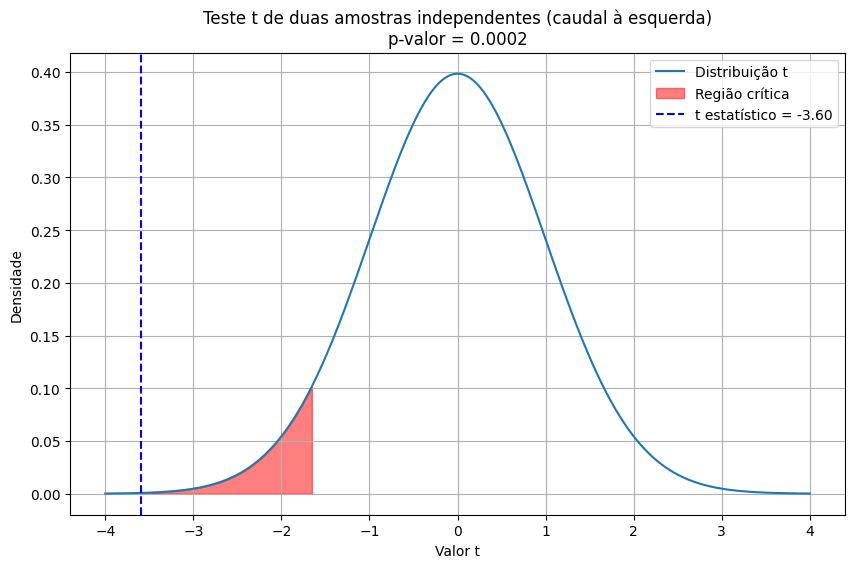

In [73]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Gerar dados de exemplo
np.random.seed(0)
data1 = np.random.normal(loc=5, scale=1, size=100)
data2 = np.random.normal(loc=5.5, scale=1, size=100)

# Realizar o teste t de duas amostras (caudal à esquerda)
t_statistic, p_value = stats.ttest_ind(data1, data2, alternative='less')

# Parâmetros para o gráfico
df = len(data1) + len(data2) - 2
alpha = 0.05

# Gerar a distribuição t
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Determinar o valor crítico para a cauda à esquerda
critical_value = stats.t.ppf(alpha, df)

# Plotar a distribuição t
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t')

# Sombra para a região crítica à esquerda
plt.fill_between(x, y, where=(x < critical_value), color='red', alpha=0.5, label='Região crítica')

# Linha para o valor t observado
plt.axvline(x=t_statistic, color='blue', linestyle='--', label=f't estatístico = {t_statistic:.2f}')

# Adicionar legendas e títulos
plt.legend()
plt.xlabel('Valor t')
plt.ylabel('Densidade')
plt.title(f'Teste t de duas amostras independentes (caudal à esquerda)\np-valor = {p_value:.4f}')
plt.grid(True)
plt.show()


In [88]:
import scipy.stats as stats

# Dados da amostra
media_amostral = 23  # Média amostral observada
media_anunciada = 20  # Média anunciada pela farmácia
tamanho_amostra = 40  # Tamanho da amostra

# Desvio padrão
desvio_padrao_estimado = 5 

# Cálculo da estatística t
estatistica_t = (media_amostral - media_anunciada) / (desvio_padrao_estimado / (tamanho_amostra ** 0.5))
print(f"estatistica_t = {estatistica_t:.4f}")
print()

# Cálculo do p-valor para um teste unilateral à direita
p_valor = 1 - stats.t.cdf(estatistica_t, df=tamanho_amostra - 1)
print(f"O p-valor vale: {p_valor:.4f}")

estatistica_t = 3.7947

O p-valor vale: 0.0003
